In [26]:
import pandas as pd

In [27]:
test=pd.read_csv("test_x.csv")

In [28]:
data=test

In [29]:
data.head()

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,Erkek,51-60,Evli,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,365331.930346,Köy veya Kasaba,Giyim,5566.587664,15.442635,Etmiyor,19.646460
1,1,Erkek,41-50,Bekar,Lise Mezunu,İşsiz veya Düzenli Bir İşi Yok,414899.236174,Büyük Şehir,Spor Malzemeleri,6756.766203,14.957246,Etmiyor,19.675863
2,2,Kadın,>60,Evli,Eğitimsiz,İşsiz veya Düzenli Bir İşi Yok,152825.872271,Küçük Şehir,Giyim,4493.915682,10.907930,Etmiyor,46.904518
3,3,Kadın,51-60,Evli,Doktora Ötesi,Düzenli ve Ücretli Bir İşi Var,489052.908472,Köy veya Kasaba,Kozmetik,42670.646595,32.333021,Etmiyor,48.083609
4,4,Erkek,18-30,Evli,Yüksek Lisans Mezunu,Kendi İşinin Sahibi,323635.711534,Küçük Şehir,Giyim,5959.266948,4.519968,Etmiyor,12.752491


In [30]:
data.drop("index",axis=1,inplace=True)

In [31]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

In [32]:
data.isnull().sum()

Cinsiyet                                      0
Yaş Grubu                                     0
Medeni Durum                                  0
Eğitim Düzeyi                                 0
İstihdam Durumu                               0
Yıllık Ortalama Gelir                         0
Yaşadığı Şehir                                0
En Çok İlgilendiği Ürün Grubu                 0
Yıllık Ortalama Satın Alım Miktarı            0
Yıllık Ortalama Sipariş Verilen Ürün Adedi    0
Eğitime Devam Etme Durumu                     0
Yıllık Ortalama Sepete Atılan Ürün Adedi      0
dtype: int64

In [33]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Yıllık Ortalama Gelir,2340.0,362252.366863,223206.339620,80656.752683,212008.058731,283694.655987,466988.700685,1.229399e+06
Yıllık Ortalama Satın Alım Miktarı,2340.0,16674.303935,14266.101056,2870.657175,4807.074240,8186.095300,30747.419142,4.638054e+04
Yıllık Ortalama Sipariş Verilen Ürün Adedi,2340.0,23.465787,14.559035,0.000000,11.336283,20.094319,33.431156,6.401748e+01
Yıllık Ortalama Sepete Atılan Ürün Adedi,2340.0,72.078920,46.311708,5.283642,24.383782,71.033886,104.202802,2.377686e+02


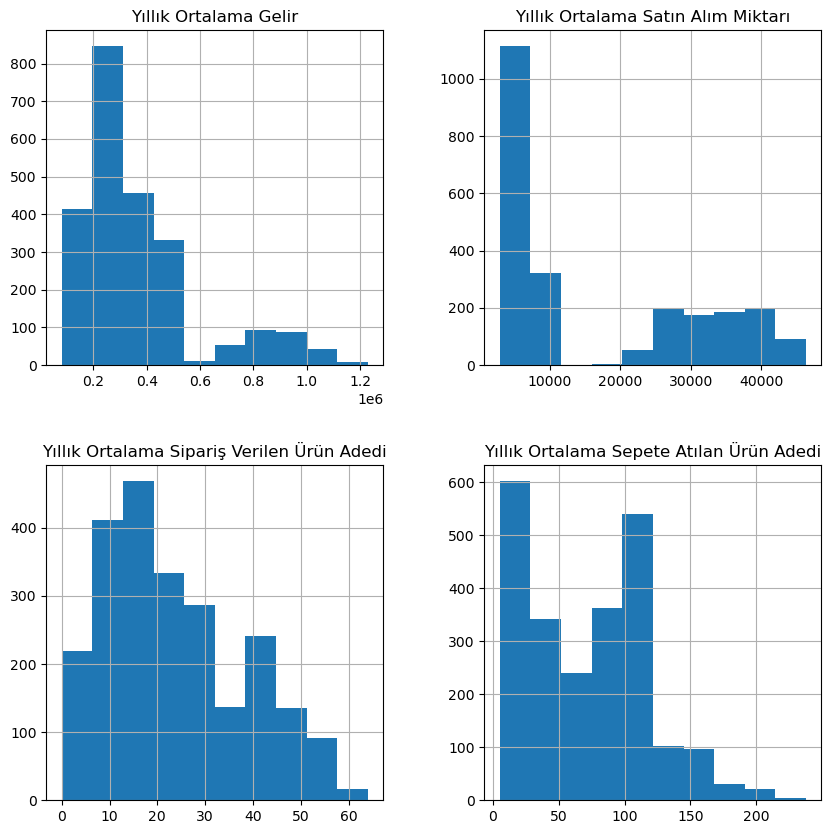

In [34]:
data.hist(figsize = (10,10));

In [35]:
#dönüştürelecek DataFrame adı -->data

columns_l = list(data.columns)
categorical_columns = []

object_to_category = False  # Önce döngüde herhangi bir değişiklik yapılmadığını varsayalım

for i in columns_l:
    if data[i].dtype == 'object' or data[i].dtype.name == 'category':
        categorical_columns.append(i)
        if data[i].dtype == 'object':
            object_to_category = True  # En az bir "object" tipinde sütun bulundu

# "object" tipindeki sütunları "category" tipine dönüştürme ve çevrilenleri yazdırma
for column in categorical_columns:
    if data[column].dtype == 'object':
        data[column] = data[column].astype('category')

# Eğer dönüştürme yapıldıysa, çevrilenleri yazdırma
if object_to_category:
    print("Kategorik değişkene çevrilenler:")
    for column in categorical_columns:
        if data[column].dtype == 'category':
            print(column)
else:
    print("Object tipinde kolon yok.")

Kategorik değişkene çevrilenler:
Cinsiyet
Yaş Grubu
Medeni Durum
Eğitim Düzeyi
İstihdam Durumu
Yaşadığı Şehir
En Çok İlgilendiği Ürün Grubu
Eğitime Devam Etme Durumu


In [36]:
import pandas as pd
#girdi--> data

df = pd.DataFrame(data)

# Kategorik sütunlara dönüşüm ve (n-1) kuralı uygulama
categorical_columns = df.select_dtypes(include=["category"]).columns

for column in categorical_columns:
    dummies = pd.get_dummies(df[column], prefix=column, drop_first=True)
    df = pd.concat([df, dummies], axis=1)
    df.drop(column, axis=1, inplace=True)
    
data=df

In [37]:
dumy_colons = []
x=data

for column in x.columns:
    if x[column].dtype == "uint8":
        dumy_colons.append(column)
    else:
        pass
dumy_colons

['Cinsiyet_Kadın',
 'Yaş Grubu_31-40',
 'Yaş Grubu_41-50',
 'Yaş Grubu_51-60',
 'Yaş Grubu_>60',
 'Medeni Durum_Evli',
 'Eğitim Düzeyi_Doktora Ötesi',
 'Eğitim Düzeyi_Eğitimsiz',
 'Eğitim Düzeyi_Lise Mezunu',
 'Eğitim Düzeyi_Ortaokul Mezunu',
 'Eğitim Düzeyi_Yüksek Lisans Mezunu',
 'Eğitim Düzeyi_Yüksekokul Mezunu',
 'Eğitim Düzeyi_Üniversite Mezunu',
 'Eğitim Düzeyi_İlkokul Mezunu',
 'İstihdam Durumu_Emekli',
 'İstihdam Durumu_Kendi İşinin Sahibi',
 'İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok',
 'Yaşadığı Şehir_Köy veya Kasaba',
 'Yaşadığı Şehir_Küçük Şehir',
 'Yaşadığı Şehir_Kırsal',
 'En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya',
 'En Çok İlgilendiği Ürün Grubu_Giyim',
 'En Çok İlgilendiği Ürün Grubu_Kozmetik',
 'En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri',
 'Eğitime Devam Etme Durumu_Etmiyor']

In [38]:
#girdiler*************
#data-->girdi dataso
#dumy_columns-->duy değişken kolonları
from sklearn.preprocessing import StandardScaler

# Veri setinizdeki dummy değişkenleri belirtin (örneğin ["Gender", "City"])
dummy_columns = dumy_colons

# Dummy değişkenleri ayrıştırın ve sadece sayısal sütunları seçin
data_without_dummies = data.drop(dummy_columns, axis=1)

# Z-skor standardizasyonu için StandardScaler kullanımı
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_without_dummies)

# Standartlaştırılmış verileri kullanarak yeni bir DataFrame oluşturun
scaled_df = pd.DataFrame(scaled_features, columns=data_without_dummies.columns)

# Dummy değişkenleri yeni DataFrame'e ekleyin
for column in dummy_columns:
    scaled_df[column] = data[column]

data=scaled_df

In [39]:
data.head()

,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,Medeni Durum_Evli,...,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Etmiyor
0,0.013800,-0.778776,-0.551195,-1.132406,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,1
1,0.235917,-0.695331,-0.584541,-1.131771,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,1
2,-0.938465,-0.853982,-0.862732,-0.543702,1,0,0,0,1,1,...,0,1,0,1,0,0,1,0,0,1
3,0.568208,1.822635,0.609184,-0.518237,1,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,1
4,-0.173046,-0.751244,-1.301588,-1.281298,0,0,0,0,0,1,...,1,0,0,1,0,0,1,0,0,1


In [40]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans

KMeans(n_clusters=4)

In [41]:
k_fit = kmeans.fit(data);

In [42]:
kmeans = KMeans(n_clusters = 2)
k_fit = kmeans.fit(df)

In [43]:
kumeler = k_fit.labels_

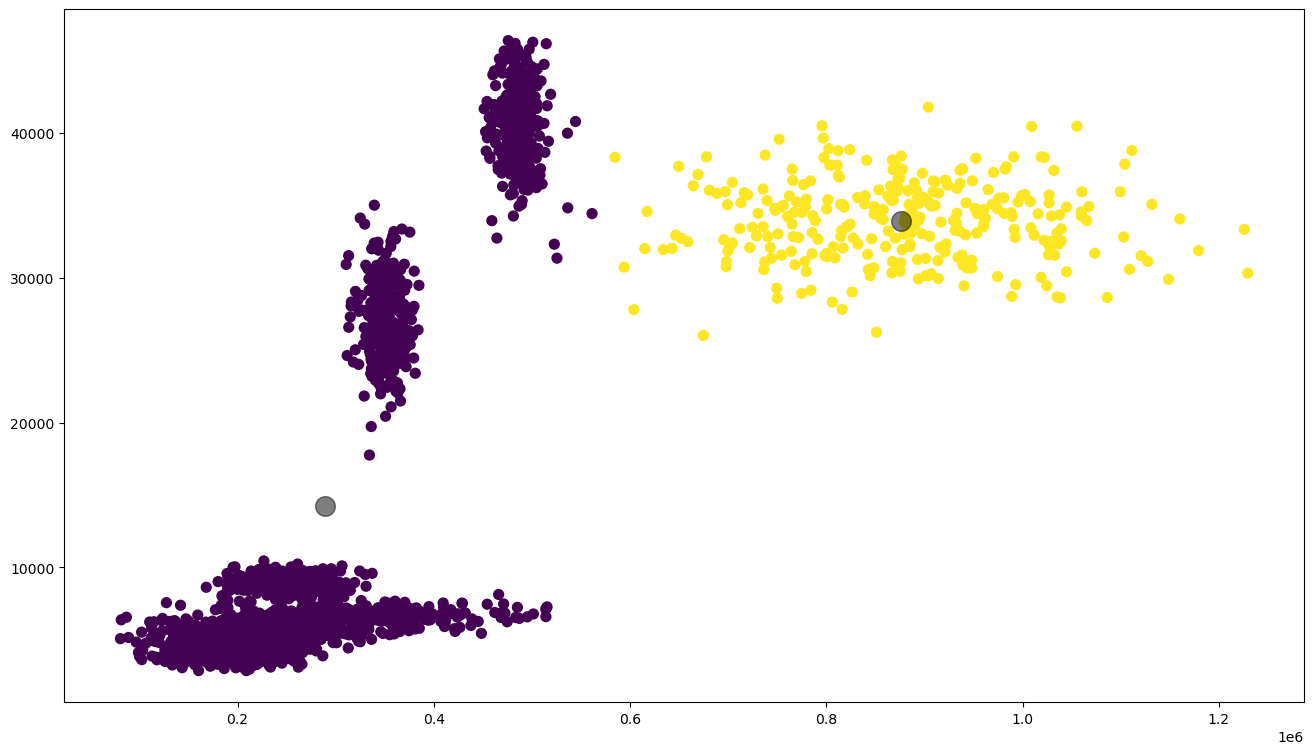

In [44]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")

merkezler = k_fit.cluster_centers_

plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha = 0.5);

In [45]:
from mpl_toolkits.mplot3d import Axes3D

In [46]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_
merkezler = kmeans.cluster_centers_

In [47]:
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2]);

<Figure size 1600x900 with 0 Axes>

In [48]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=kumeler)
ax.scatter(merkezler[:, 0], merkezler[:, 1], merkezler[:, 2], 
           marker='*', 
           c='#050505', 
           s=1000);

<Figure size 1600x900 with 0 Axes>

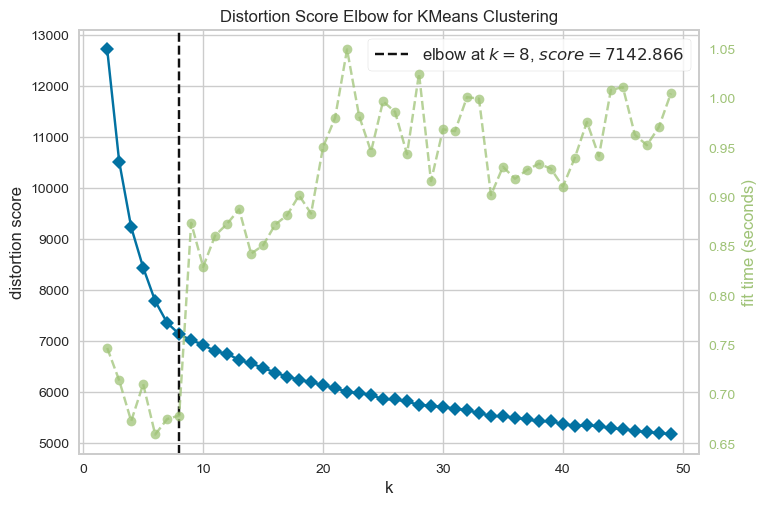

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [49]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,50))
visualizer.fit(data) 
visualizer.poof()  

In [50]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 8)
kmeans

KMeans()

In [51]:
k_fit = kmeans.fit(data)

In [52]:
k_tahminler=k_fit.predict(data)

In [53]:
k_tahminler_fr=pd.DataFrame(k_tahminler)

In [54]:
k_tahminler_fr

,0
0,1
1,1
2,6
3,5
4,7
...,...
2335,3
2336,6
2337,2
2338,4


In [55]:
y_pred_duz = k_tahminler.flatten()

veri={"id":range(2340),
     "Öbek Adı":y_pred_duz}

In [56]:
k_tahminler_fr=pd.DataFrame(veri)

In [57]:
k_tahminler_fr.head()

,id,Öbek Adı
0,0,1
1,1,1
2,2,6
3,3,5
4,4,7


In [58]:
data2=pd.read_csv("tahmin_verileri_random_forest_without_scaler_optimize.csv")

In [59]:
data2.head()

,id,Öbek İsmi
0,0,obek_3
1,1,obek_3
2,2,obek_2
3,3,obek_6
4,4,obek_1


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot("Öbek İsmi",data=data2);



TypeError: countplot() got multiple values for argument 'data'

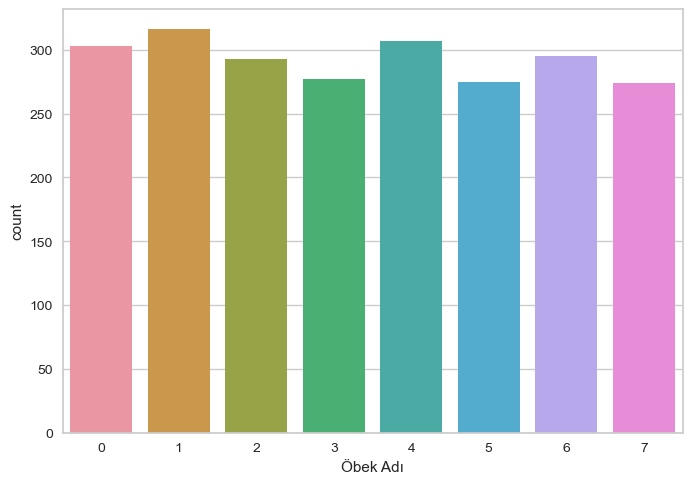

In [ ]:
sns.countplot("Öbek Adı",data=data1);

In [ ]:
class_counts = df['Öbek İsmi'].value_counts()
print("Kategori Sınıf Frekansları:")
print(class_counts)

Kategori Sınıf Frekansları:
obek_1    313
obek_7    306
obek_6    303
obek_4    296
obek_5    293
obek_3    286
obek_8    277
obek_2    266
Name: Öbek İsmi, dtype: int64


In [ ]:
class_counts = data1['Öbek Adı'].value_counts()
print("Kategori Sınıf Frekansları:")
print(class_counts)

Kategori Sınıf Frekansları:
1    316
4    307
0    303
6    295
2    293
3    277
5    275
7    274
Name: Öbek Adı, dtype: int64


In [ ]:
import pandas as pd

# Örnek veri seti (data1)


df = pd.DataFrame(data1)

# Sınıf adlarını değiştirmek istediğiniz sözlüğü tanımlayın
class_name_replacements = {
    '1': 'obek_1',
    '4': 'obek_7',
    '0': 'obek_6',
    '6': 'obek_4',
    '2': 'obek_5',
    '3': 'obek_3',
    '5': 'obek_8',
    '7': 'obek_2'
}

# 'Öbek İsmi' sütunundaki sınıf adlarını değiştirin
df['Öbek Adı'] = df['Öbek Adı'].replace(class_name_replacements)

df.head()


,id,Öbek Adı
0,0,7
1,1,7
2,2,5
3,3,0
4,4,1


In [ ]:
import pandas as pd

# Örnek veri seti (data1)


df = pd.DataFrame(data1)

# Sınıf adlarını değiştirmek istediğiniz sözlüğü tanımlayın
class_name_replacements = {
    '1': 'obek_1',
    '4': 'obek_7',
    '0': 'obek_6',
    '6': 'obek_4',
    '2': 'obek_5',
    '3': 'obek_3',
    '5': 'obek_8',
    '7': 'obek_2'
}

# 'Öbek İsmi' sütunundaki sınıf adlarını değiştirin
df['Öbek Adı'].replace(class_name_replacements, inplace=True)

df.head()


,id,Öbek Adı
0,0,7
1,1,7
2,2,5
3,3,0
4,4,1


In [ ]:
import pandas as pd

# Örnek veri seti (data1)
data1 = {
    'id': [0, 1, 2, 3, 4],
    'Öbek Adı': [7, 7, 5, 0, 1]
}

df = pd.DataFrame(data1)

# Sınıf numaralarını adlarla değiştirmek istediğiniz sözlüğü tanımlayın
class_name_replacements = {
    "0": 'obek_6',
    "1": 'obek_1',
    "2": 'obek_5',
    "3": 'obek_3',
    "4": 'obek_7',
    "5": 'obek_8',
    "6": 'obek_4',
    "7": 'obek_2'
}

# 'Öbek Adı' sütunundaki sınıf numaralarını adlarla değiştirin
df['Öbek Adı'] = df['Öbek Adı'].replace(class_name_replacements)

print(df)


   id  Öbek Adı
0   0         7
1   1         7
2   2         5
3   3         0
4   4         1


In [ ]:
import pandas as pd

veri = data1

sınıf_değişiklikleri = {
    "1": 'obek_1',
    "4": 'obek_7',
    "0": 'obek_6',
    "6": 'obek_4',
    "2": 'obek_5',
    "3": 'obek_3',
    "5": 'obek_8',
    "7": 'obek_2'
}

df = pd.DataFrame(veri)
df['Öbek Adı'] = df['Öbek Adı'].map(sınıf_değişiklikleri)

print(df)


   id Öbek Adı
0   0      NaN
1   1      NaN
2   2      NaN
3   3      NaN
4   4      NaN


(5, 2)

In [ ]:
veri = data1

sınıf_değişiklikleri = {
    1: 'obek_1',
    4: 'obek_7',
    0: 'obek_6',
    6: 'obek_4',
    2: 'obek_5',
    3: 'obek_3',
    5: 'obek_8',
    7: 'obek_2'
}

for satır in veri:
    öbek_adı = satır['Öbek Adı']
    if öbek_adı in sınıf_değişiklikleri:
        satır['Öbek Adı'] = sınıf_değişiklikleri[öbek_adı]

print(veri)


TypeError: string indices must be integers

In [ ]:
df.head()

,id,Öbek Adı
0,0,None
1,1,None
2,2,None
3,3,None
4,4,None


In [ ]:
df.rename(columns={'Öbek Adı': 'Öbek İsmi'}, inplace=True)
df.head()

,id,Öbek İsmi
0,0,obek_2
1,1,obek_2
2,2,obek_8
3,3,obek_6
4,4,obek_1


In [ ]:
df.to_csv('tahmin_verielri_kum.csv', index=False)


In [81]:
def decode_obek(encoded):
    decoder = {
        1: 'obek_1',
        4: 'obek_7',
        0: 'obek_6',
        6: 'obek_4',
        2: 'obek_5',
        3: 'obek_3',
        5: 'obek_8',
        7: 'obek_2'
    }
    return decoder.get(encoded)

In [82]:
data1=k_tahminler_fr
data1_series = data1["Öbek Adı"]
data1_series

0       1
1       1
2       6
3       5
4       7
       ..
2335    3
2336    6
2337    2
2338    4
2339    5
Name: Öbek Adı, Length: 2340, dtype: int32

In [85]:
decoded_obekler = []
for encoded in data1_series:
    decoded = decode_obek(encoded)
    decoded_obekler.append(decoded)


,Öbek İsmi
0,obek_1
1,obek_1
2,obek_4
3,obek_8
4,obek_2
...,...
2335,obek_3
2336,obek_4
2337,obek_5
2338,obek_7


In [86]:
veri = {
    'id': range(2340),
    'Öbek İsmi': decoded_obekler # Bu kısmı doğru 1B y_pred dizisi ile güncelleyin
}

In [87]:
Tahmin_Dataframe = pd.DataFrame(veri)
Tahmin_Dataframe.to_csv('tahmin_verileri_clusuter.csv', index=False)

# hiyearşik kümeleme

In [ ]:
df=data

In [ ]:
from scipy.cluster.hierarchy import linkage
hc_complete = linkage(df, "complete")
hc_average = linkage(df, "average")
hc_single = linkage(df, "single")

In [ ]:
dir(hc_complete)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

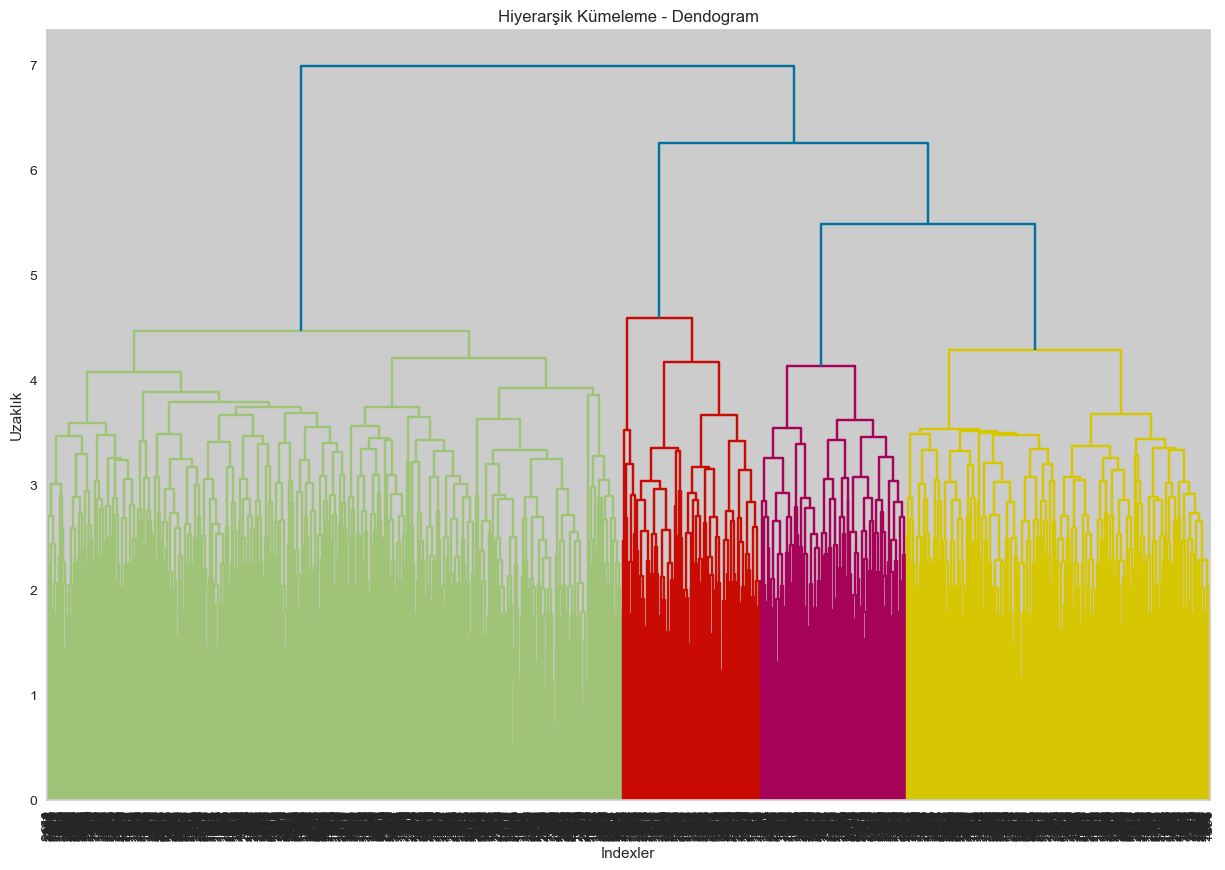

In [ ]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_complete,
    leaf_font_size=10
);

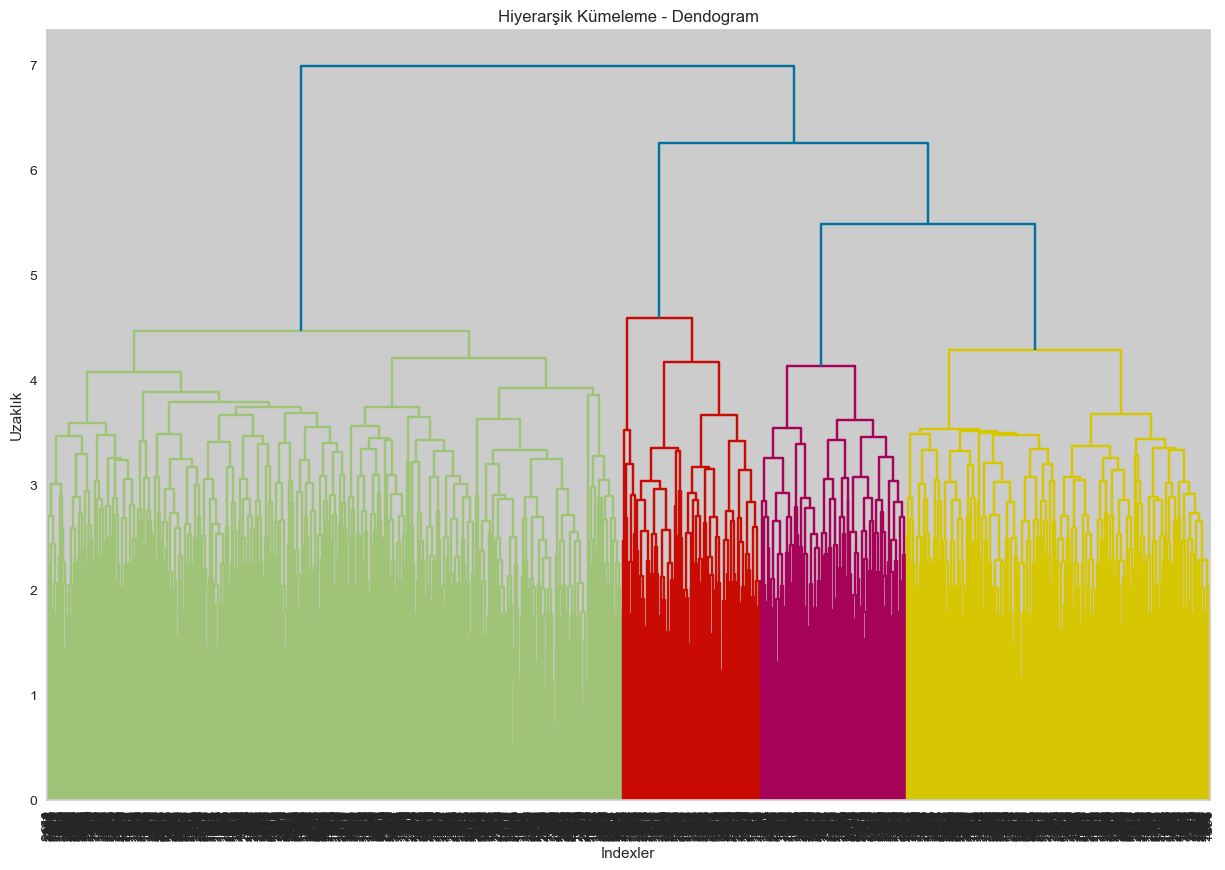

In [ ]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
den = dendrogram(
    hc_complete,
    leaf_font_size=10
);

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 4, 
                                  affinity = "euclidean", 
                                  linkage = "ward")

cluster.fit_predict(df)

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)